# e.g. 10: Compare monthly rainfall climatology from daily inputs from 2 forecast runs & control & observations

# last edited 25 July 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_daily_files_1st= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/day/pr/gn/v20171025/pr_day_historical_CAFE-1-0_r2i1p1f1_gn_20160101-20211231.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p1f1/day/pr/gn/v20171025/pr_day_historical_CAFE-1-0_r3i1p1f1_gn_20160101-20211231.nc']]
cafe_daily_files_2nd= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p4f1/day/pr/gn/v20171025/pr_day_historical_CAFE-1-0_r2i1p4f1_gn_20160101-20211231.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p4f1/day/pr/gn/v20171025/pr_day_historical_CAFE-1-0_r3i1p4f1_gn_20160101-20211231.nc']]
cafe_files_control= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/day/pr/gn/v20171025/pr_day_piControl_CAFE-1-0_r1i1p9f1_gn_04710101-04801231.nc', '/OS

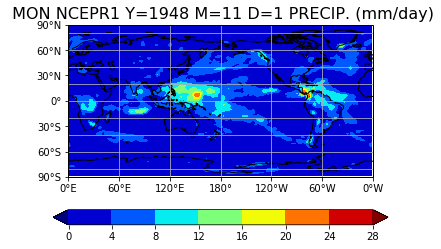

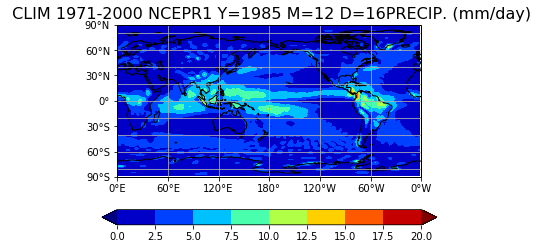

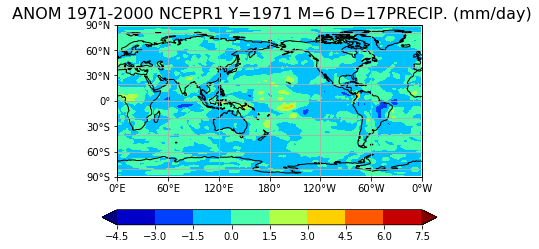

n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 2: no ensembles, multiple input files.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.


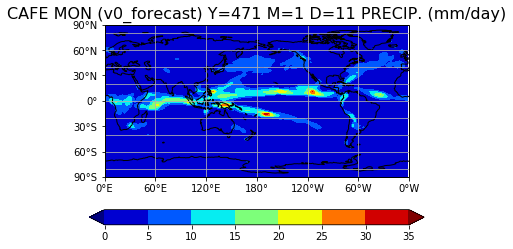

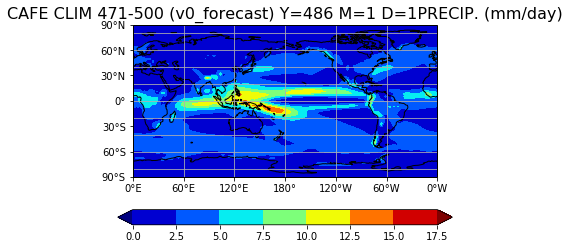

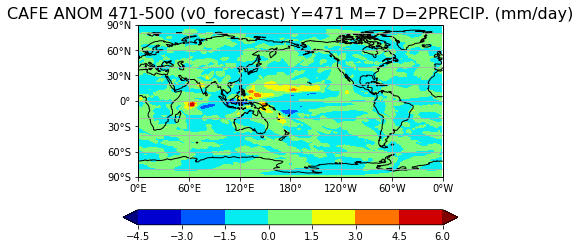

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
n_data_funcs.calculate_quantity: Using whole lat/lon region.


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.


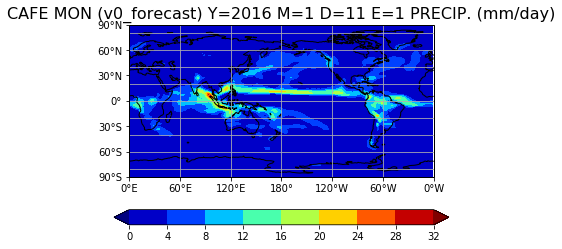

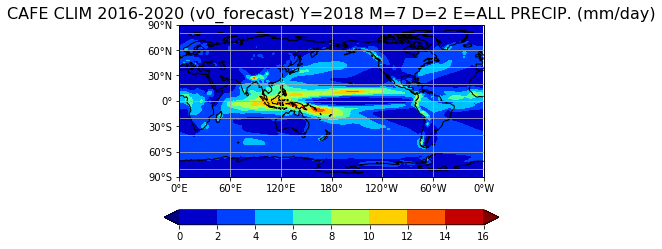

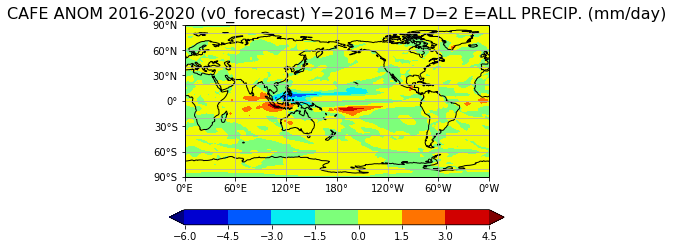

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.


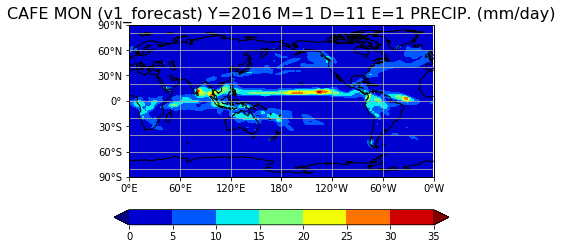

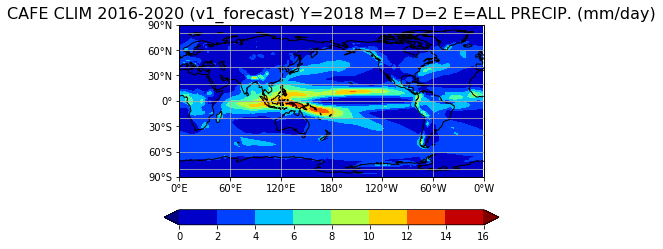

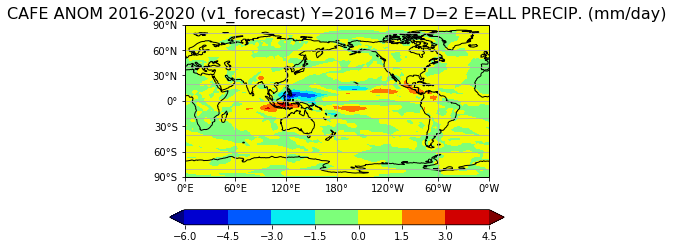

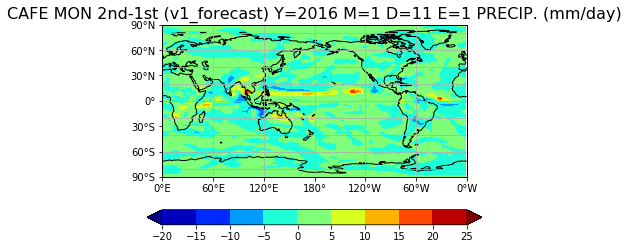

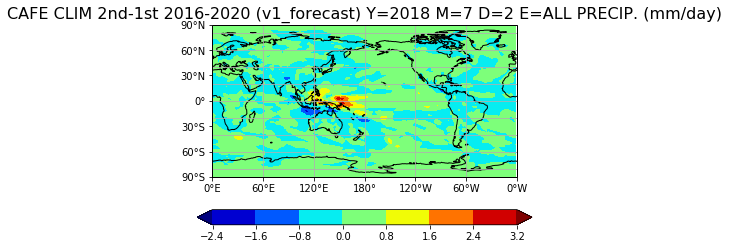

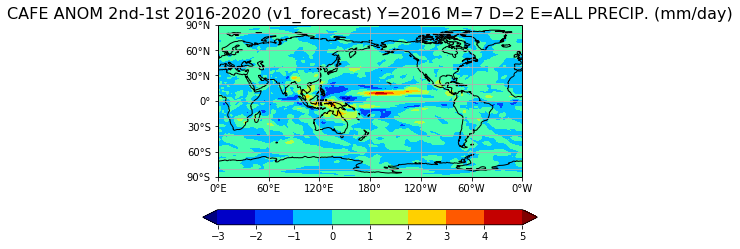

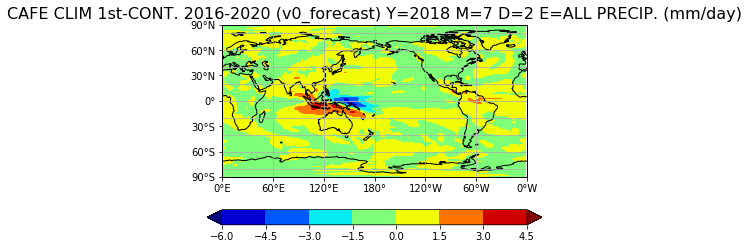

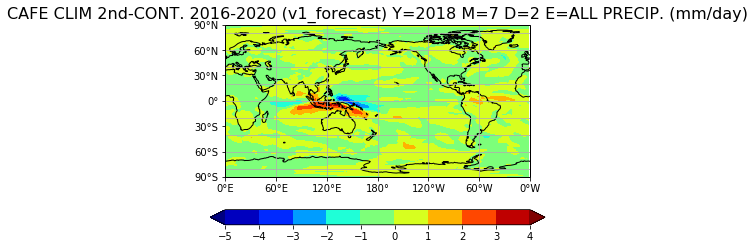

jupyter_notebook:260: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


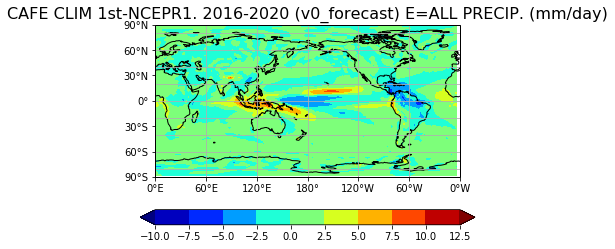

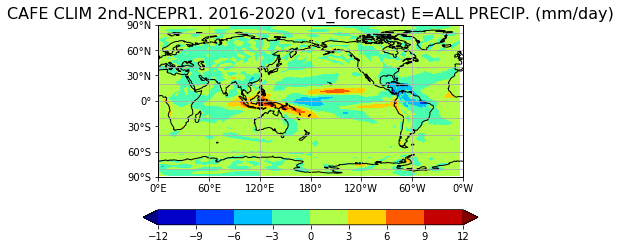

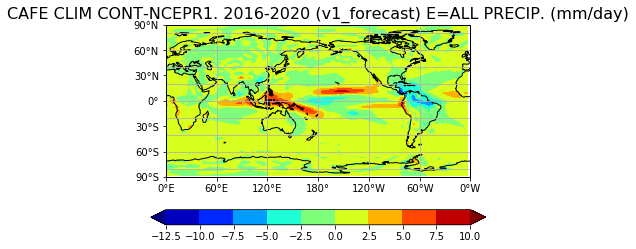

END


In [2]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
#   from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  from matplotlib.mlab import griddata

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple

  from n_data_funcs import n_data_funcs
  
  model='CAFE'
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  ivar_str_cafe='pr';offset=0.0;scale=86400.0;long_name='Rainfall';short_name='PRECIP.';units='mm/day';table='day'

  pval_1st=1 #v1_forecast
  cafe_daily_files_1st,cafe_daily_files_flat_1st=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_daily_files_1st=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_1st)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    daily_ifils_1st=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_1st)+'f1_gn_20160101-20211231.nc']
    for file in daily_ifils_1st:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_daily_files_1st.append(idir+'/'+file)
    cafe_daily_files_1st.append(cafe_inner_daily_files_1st)

  print('cafe_daily_files_1st=',cafe_daily_files_1st)

#===============================================================================

  pval_2nd=4 #v0_forecast
  cafe_daily_files_2nd,cafe_daily_files_flat_2nd=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_daily_files_2nd=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    daily_ifils_2nd=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1_gn_20160101-20211231.nc']
    for file in daily_ifils_2nd:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_daily_files_2nd.append(idir+'/'+file)
    cafe_daily_files_2nd.append(cafe_inner_daily_files_2nd)

  print('cafe_daily_files_2nd=',cafe_daily_files_2nd)

#===============================================================================
  grid_label='cafep'
  cafe_calendar='julian'
  
  pval=9

  cafe_control_calendar='noleap'

  idir_control=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'

  ifils_control= [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_04710101-05001231.nc']
  cafe_files_control=[[idir_control+'/'+ifils_control[0]]]

  ifils_control= \
    [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_04610101-04701231.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_04710101-04801231.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_04810101-04901231.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_04910101-05001231.nc' \
    ]
  cafe_files_control=[[idir_control+'/'+ifils_control[1],idir_control+'/'+ifils_control[2], idir_control+'/'+ifils_control[3]]]

  print('cafe_files_control=',cafe_files_control)
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  
#===============================================================================

  product='NCEPR1'

  ivar_str_ncepr1='prate';ifil_prefix_ncepr1='prate';offset=0.0;scale=86400.0;long_name='Rainfall';units='mm/day'

  grid_label='ncep_r1'
  ncepr1_calendar='proleptic_gregorian'

  ncepr1_files,ncepr1_files_flat=[],[]
  idir=topdir_ncep+'short/r67/mac599/data/NCEP_R1'
  ifils=[ifil_prefix_ncepr1+'.mon.mean.nc']
  for file in ifils:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      ncepr1_files.append(idir+'/'+file)  
  ncepr1_files=[ncepr1_files]

  print('ncepr1_files=',ncepr1_files)
  
#===============================================================================

  cbeg=1971
  cend=2000
  abeg=1971
  aend=2000

  ncepr1_file_var=n_data_funcs(Diag=False,input_files=ncepr1_files,input_var_name=ivar_str_ncepr1)

  ncepr1_file_var.calculate_filedatetime_info(Diag=False,calendar=ncepr1_calendar)

  ncepr1_file_var.get_latlon_info(Diag=False)

  ncepr1_monthly_pr=ncepr1_file_var.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,93,0,191')

  ncepr1_pr_annual_climatology,ncepr1_pr_annual_anomaly=ncepr1_file_var.monthly_clim_anom( \
    Diag=False,input=ncepr1_monthly_pr,AnnOut=True,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend) #cbeg=cbeg,cend=cend,abeg=abeg,aend=aend,Diag=False)  
  
  shade_2d_latlon(ncepr1_monthly_pr[month_to_plot,:,:]*scale+offset, \
    xyvals=(ncepr1_file_var.lon[:],ncepr1_file_var.lat[:]), clevs=clevs, \
    title=' MON '+product+ \
    ' Y='+str(ncepr1_file_var.date_time_stamp_tfreq[month_to_plot].year)+ \
    ' M='+str(ncepr1_file_var.date_time_stamp_tfreq[month_to_plot].month)+ \
    ' D='+str(ncepr1_file_var.date_time_stamp_tfreq[month_to_plot].day)+ \
    ' '+short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(ncepr1_pr_annual_climatology[:]*scale+offset, \
    xyvals=(ncepr1_file_var.lon[:],ncepr1_file_var.lat[:]), clevs=clevs, \
    title=' CLIM '+str(cbeg)+'-'+str(cend)+' '+product+ \
    ' Y='+str(ncepr1_file_var.date_time_stamp_climatology.year)+ \
    ' M='+str(ncepr1_file_var.date_time_stamp_climatology.month)+ \
    ' D='+str(ncepr1_file_var.date_time_stamp_climatology.day)+ \
    short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(ncepr1_pr_annual_anomaly[year_to_plot,:]*scale, \
    xyvals=(ncepr1_file_var.lon[:],ncepr1_file_var.lat[:]), clevs=clevs, \
    title=' ANOM '+str(cbeg)+'-'+str(cend)+' '+product+ \
    ' Y='+str(ncepr1_file_var.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(ncepr1_file_var.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(ncepr1_file_var.date_time_stamp_anomaly[year_to_plot].day)+ \
    short_name, \
    units=units, cmap='jet')

#===============================================================================

  cbeg=471
  cend=500
  abeg=471
  aend=500
  
  cafe_daily_files_control=n_data_funcs(Diag=False,input_files=cafe_files_control,input_var_name=ivar_str_cafe)

  cafe_daily_files_control.calculate_filedatetime_info(Diag=False,calendar=cafe_control_calendar)

  cafe_daily_files_control.get_latlon_info(Diag=False,lat='lat',lon='lon')

  cafe_pr_daily_control=cafe_daily_files_control.calculate_quantity('dummy', Diag=False, quantity='latlon_region')

  cafe_daily_files_control.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

  cafe_monthly_pr_from_daily_control=cafe_daily_files_control.daily_to_monthly(EndOption=1,input=cafe_pr_daily_control)
  
  cafe_pr_annual_climatology_from_monthly_control, \
  cafe_pr_annual_anomaly_from_monthly_control=cafe_daily_files_control.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_pr_from_daily_control, AnnOut=True, ZeroClim=False)
  
  shade_2d_latlon(cafe_monthly_pr_from_daily_control[month_to_plot,:,:]*scale+offset, \
    xyvals=(cafe_daily_files_control.lon[:],cafe_daily_files_control.lat[:]), clevs=clevs, \
    title=model+' MON ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_control.date_time_stamp_tfreq[month_to_plot].year)+ \
    ' M='+str(cafe_daily_files_control.date_time_stamp_tfreq[month_to_plot].month)+ \
    ' D='+str(cafe_daily_files_control.date_time_stamp_tfreq[month_to_plot].day)+ \
    ' '+short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(cafe_pr_annual_climatology_from_monthly_control[:]*scale+offset, \
    xyvals=(cafe_daily_files_control.lon[:],cafe_daily_files_control.lat[:]), clevs=clevs, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_control.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_control.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_control.date_time_stamp_climatology.day)+ \
    short_name, \
    units=units, cmap='jet')
    
  shade_2d_latlon(cafe_pr_annual_anomaly_from_monthly_control[year_to_plot,:]*scale, \
    xyvals=(cafe_daily_files_control.lon[:],cafe_daily_files_control.lat[:]), clevs=clevs, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_control.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_daily_files_control.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_daily_files_control.date_time_stamp_anomaly[year_to_plot].day)+ \
    short_name, \
    units=units, cmap='jet')
  
#===============================================================================
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020
  
  cafe_daily_files_1st=n_data_funcs(input_files=cafe_daily_files_1st,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_1st.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_1st.get_latlon_info(Diag=False,lat='lat',lon='lon')

  cafe_pr_daily_1st=cafe_daily_files_1st.calculate_quantity('dummy',quantity='latlon_region')

  cafe_daily_files_1st.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

  cafe_monthly_pr_from_daily_1st=cafe_daily_files_1st.daily_to_monthly(EndOption=1,input=cafe_pr_daily_1st)
  
  cafe_pr_annual_climatology_from_daily_1st,cafe_pr_annual_anomaly_from_daily_1st=cafe_daily_files_1st.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_pr_from_daily_1st, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  shade_2d_latlon(cafe_monthly_pr_from_daily_1st[month_to_plot,ensemble_to_plot,:,:]*scale+offset, \
    xyvals=(cafe_daily_files_1st.lon[:],cafe_daily_files_1st.lat[:]), clevs=clevs, \
    title=model+' MON ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_1st.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_daily_files_1st.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_daily_files_1st.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_1st[:],axis=0)*scale+offset, \
    xyvals=(cafe_daily_files_1st.lon[:],cafe_daily_files_1st.lat[:]), clevs=clevs, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_1st.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_1st.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_1st.date_time_stamp_climatology.day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
    
  shade_2d_latlon(np.average(cafe_pr_annual_anomaly_from_daily_1st[year_to_plot,:],axis=0)*scale, \
    xyvals=(cafe_daily_files_1st.lon[:],cafe_daily_files_1st.lat[:]), clevs=clevs, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_1st.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_daily_files_1st.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_daily_files_1st.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
  
#===============================================================================

  cafe_daily_files_2nd=n_data_funcs(input_files=cafe_daily_files_2nd,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_2nd.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_2nd.get_latlon_info(Diag=False,lat='lat',lon='lon')

  cafe_pr_daily_2nd=cafe_daily_files_2nd.calculate_quantity('dummy',quantity='latlon_region')

  cafe_daily_files_2nd.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

  cafe_monthly_pr_from_daily_2nd=cafe_daily_files_2nd.daily_to_monthly(EndOption=1,input=cafe_pr_daily_2nd)
  
  cafe_pr_annual_climatology_from_daily_2nd,cafe_pr_annual_anomaly_from_daily_2nd=cafe_daily_files_2nd.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_pr_from_daily_2nd, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  
  shade_2d_latlon(cafe_monthly_pr_from_daily_2nd[month_to_plot,ensemble_to_plot,:,:]*scale+offset, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' MON ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_2nd[:],axis=0)*scale+offset, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_climatology.day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
    
  shade_2d_latlon(np.average(cafe_pr_annual_anomaly_from_daily_2nd[year_to_plot,:],axis=0)*scale, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
  
#===============================================================================

  shade_2d_latlon(cafe_monthly_pr_from_daily_2nd[month_to_plot,ensemble_to_plot,:,:]*scale- \
    cafe_monthly_pr_from_daily_1st[month_to_plot,ensemble_to_plot,:,:]*scale, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' MON 2nd-1st ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, cmap='jet')

  shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_2nd[:],axis=0)*scale- \
    np.average(cafe_pr_annual_climatology_from_daily_1st[:],axis=0)*scale, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' CLIM 2nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_climatology.day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
    
  shade_2d_latlon(np.average(cafe_pr_annual_anomaly_from_daily_2nd[year_to_plot,:],axis=0)*scale- \
    np.average(cafe_pr_annual_anomaly_from_daily_1st[year_to_plot,:],axis=0)*scale, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' ANOM 2nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
  
#===============================================================================

  shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_1st[:],axis=0)*scale- \
    cafe_pr_annual_climatology_from_monthly_control[:]*scale, \
    xyvals=(cafe_daily_files_1st.lon[:],cafe_daily_files_1st.lat[:]), clevs=clevs, \
    title=model+' CLIM 1st-CONT. '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_daily_files_1st.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_1st.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_1st.date_time_stamp_climatology.day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
  
  shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_2nd[:],axis=0)*scale- \
    cafe_pr_annual_climatology_from_monthly_control[:]*scale, \
    xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
    title=model+' CLIM 2nd-CONT. '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_daily_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files_2nd.date_time_stamp_climatology.day)+ \
    ' E=ALL '+short_name, \
    units=units, cmap='jet')
  
#===============================================================================

ncepr1_lons2d_tmp=np.expand_dims(ncepr1_file_var.lon,0)

ncepr1_lons2df=np.tile(ncepr1_lons2d_tmp, (ncepr1_file_var.nlat,1)).flatten()

ncepr1_lats2d_tmp=np.expand_dims(ncepr1_file_var.lat,1)

ncepr1_lats2df=np.tile(ncepr1_lats2d_tmp, (1,ncepr1_file_var.nlon)).flatten()

ncepr1_on_cafe = griddata(ncepr1_lons2df, ncepr1_lats2df, ncepr1_pr_annual_climatology.flatten(), \
  cafe_daily_files_control.lon, cafe_daily_files_control.lat, interp='linear')

shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_1st[:],axis=0)*scale-ncepr1_on_cafe*scale, \
  xyvals=(cafe_daily_files_1st.lon[:],cafe_daily_files_1st.lat[:]), clevs=clevs, \
  title=model+' CLIM 1st-NCEPR1. '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
  ' E=ALL '+short_name, \
  units=units, cmap='jet')

shade_2d_latlon(np.average(cafe_pr_annual_climatology_from_daily_2nd[:],axis=0)*scale-ncepr1_on_cafe*scale, \
  xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
  title=model+' CLIM 2nd-NCEPR1. '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
  ' E=ALL '+short_name, \
  units=units, cmap='jet')

shade_2d_latlon(cafe_pr_annual_climatology_from_monthly_control[:]*scale-ncepr1_on_cafe*scale, \
  xyvals=(cafe_daily_files_2nd.lon[:],cafe_daily_files_2nd.lat[:]), clevs=clevs, \
  title=model+' CLIM CONT-NCEPR1. '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
  ' E=ALL '+short_name, \
  units=units, cmap='jet')
  
#===============================================================================
  
print('END')